# Real vs Fake Job Postings Analysis 

 # Project Description
This project aims to analyze a dataset of real and fake job postings to identify common patterns among fraudulent jobs and distinguish them from real ones. Power BI creates interactive reports that visualize job distributions by location, industry, experience level, employment type, etc.

The goal is to understand the behavior of fake job postings and how they differ from genuine opportunities by examining key features in the data.


# Key Columns in the Dataset
- `title`: Job title  
- `location`: City, state, or country  
- `department`: Department or team  
- `salary_range`: Salary offered  
- `company_profile`: Description of the company  
- `description`: Job description  
- `requirements`: Required qualifications or skills  
- `benefits`: Job benefits  
- `employment_type`: Full-time, part-time, etc.  
- `required_experience`: Years of experience required  
- `required_education`: Education level required  
- `industry`: Industry sector  
- `function`: Job function  
- `fraudulent`: Label indicating if the job is fake (1 = fake, 0 = real)

# Analysis Overview
1. Fake Jobs Page:
- Job distribution by location
- The most common departments for fake jobs
- Common employment types and experience levels in fraudulent postings

 2. Real Jobs Page:
- Most in-demand job titles and industries
- Education and experience trends
- Common job locations

 3. Comparison Page:
- Differences in departments
- Differences in employment types
- Text-based analysis of descriptions and requirements

# Key Insights
- Fake job postings often lack clear locations or provide generic ones.
- Many fake jobs have vague descriptions and no salary information.
- Certain industries (like remote marketing or tech support) appear frequently in fraudulent listings.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/fake_job_postings.csv")

In [4]:
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.shape

(17880, 18)

In [6]:
df.columns.tolist()

['job_id',
 'title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [7]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [8]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


# Checking Null Values

In [9]:
df.isnull().sum().sort_values(ascending=False).head(20)


salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

In [10]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

# Removing Duplicates

In [11]:
df.duplicated().sum()

0

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(17880, 18)

# making dataframe for categorical col and num col

# Categorical Col

In [15]:
df.select_dtypes(include='object').columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

In [16]:
object_columns_df = df.select_dtypes(include='object')

In [17]:
object_columns_df.head(2)

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service


# Numericall Col

In [18]:
df.select_dtypes(include='number').columns

Index(['job_id', 'telecommuting', 'has_company_logo', 'has_questions',
       'fraudulent'],
      dtype='object')

In [19]:
int_columns_df = df.select_dtypes(include='number')

In [20]:
int_columns_df.head(2)

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,1,0,0
1,2,0,1,0,0


# Target Column

# Fake

In [21]:
fake = df[df['fraudulent'] == 1]

In [22]:
fake.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1


# Real

In [22]:
real = df[df['fraudulent'] == 0]

In [23]:
real.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [24]:
fake.shape

(866, 18)

In [25]:
real.shape

(17014, 18)

In [26]:
df.shape

(17880, 18)

# EDA

# Data Visualisation

In [27]:
fraudulent_count = df['fraudulent'].value_counts()

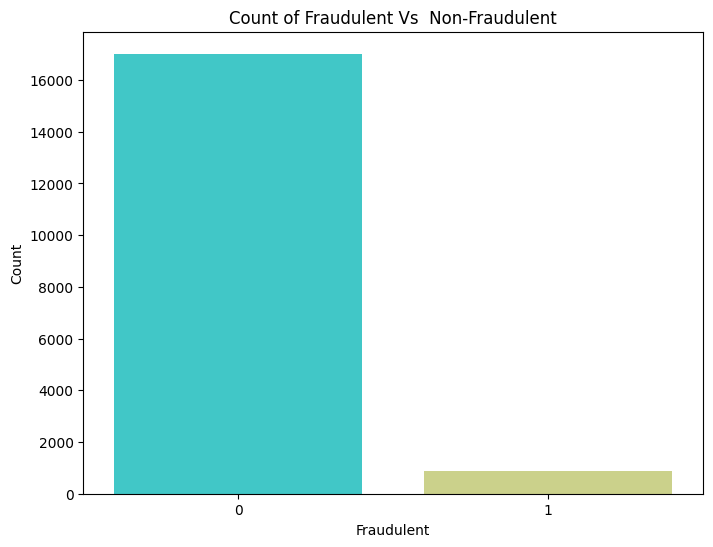

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=fraudulent_count.index, y=fraudulent_count.values, palette='rainbow')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Count of Fraudulent Vs  Non-Fraudulent')
plt.show()

### We have used magma palette by visualisation we can see the count of telecommuting and non-telecommuting data

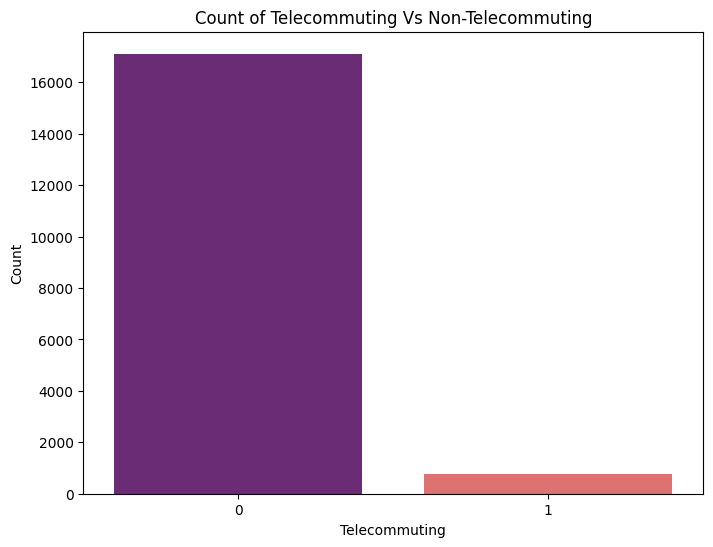

In [30]:
telecommuting_counts    = df['telecommuting'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=telecommuting_counts.index, y=telecommuting_counts.values, palette='magma')
plt.xlabel('Telecommuting')
plt.ylabel('Count')
plt.title('Count of Telecommuting Vs Non-Telecommuting')
plt.show()

### We have used color palette by visualisation we can see the count of with_logo and without_logo data

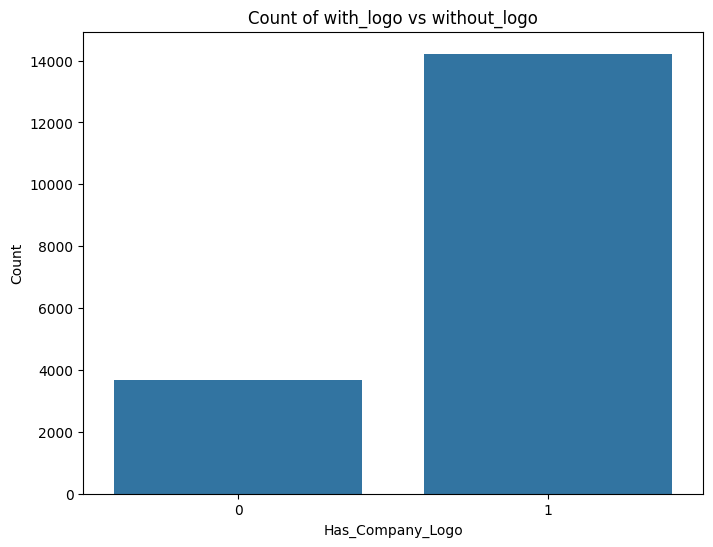

In [31]:
has_company_logo_counts = df['has_company_logo'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=has_company_logo_counts.index, y=has_company_logo_counts.values)
plt.xlabel('Has_Company_Logo')
plt.ylabel('Count')
plt.title('Count of with_logo vs without_logo')
plt.show()

### We have used color cividis by visualisation we can see the count of Ouestions and non No_Questions data

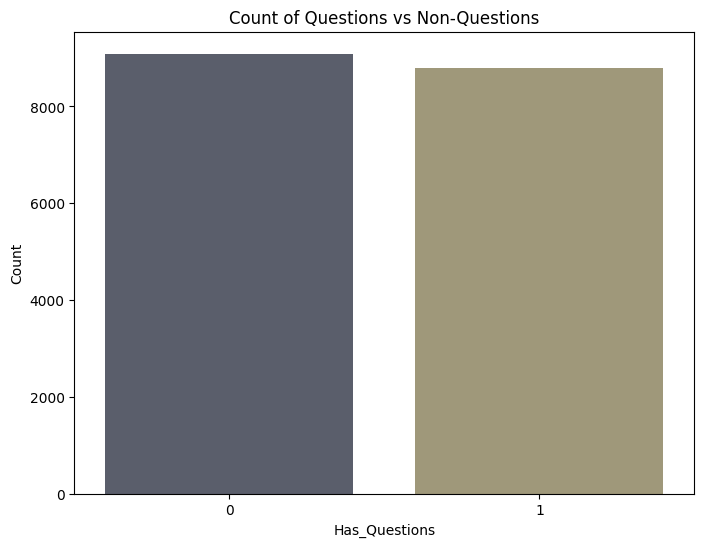

In [32]:
has_questions_counts = df['has_questions'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=has_questions_counts.index, y=has_questions_counts.values, palette='cividis')
plt.xlabel('Has_Questions')
plt.ylabel('Count')
plt.title('Count of Questions vs Non-Questions')
plt.show()

### We have used pastel color palette by visualisation we can see the count of employment_type data

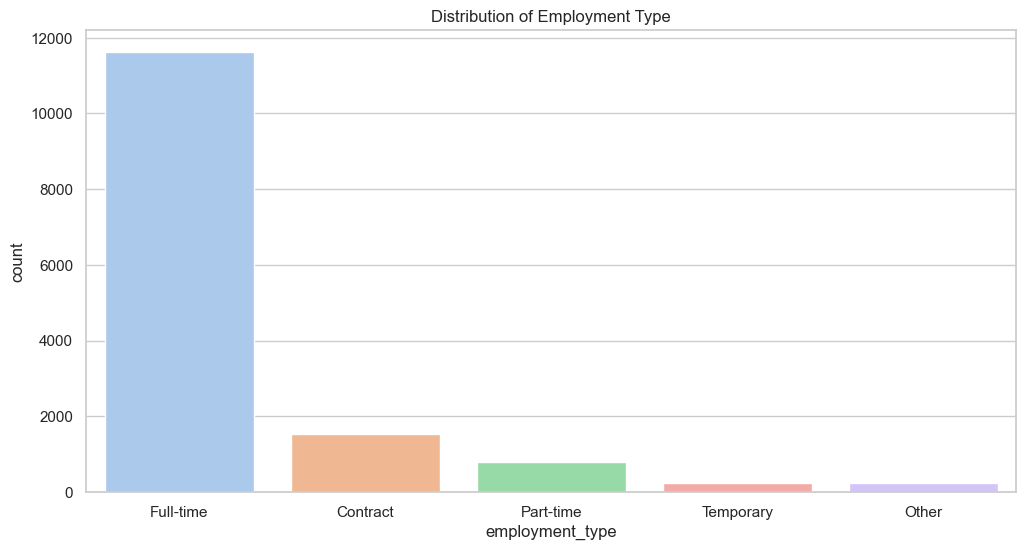

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='employment_type', data=df, palette='pastel', order=df['employment_type'].value_counts().index)

plt.title('Distribution of Employment Type')

plt.show()

### We have used viridis color palette by visualisation we can see the count of Distribution of required_experience data

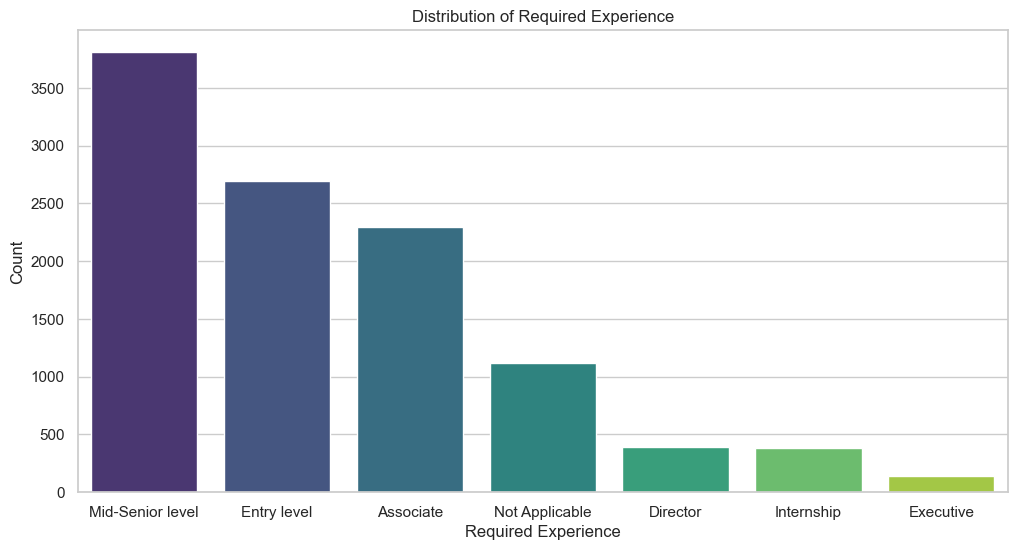

In [34]:
required_experience_counts = df['required_experience'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=required_experience_counts.index, y=required_experience_counts.values, palette='viridis')
plt.xlabel('Required Experience')
plt.ylabel('Count')
plt.title('Distribution of Required Experience')
plt.show()

### We have used rainbow color palette by visualisation we can see the count of distribution of required_education data

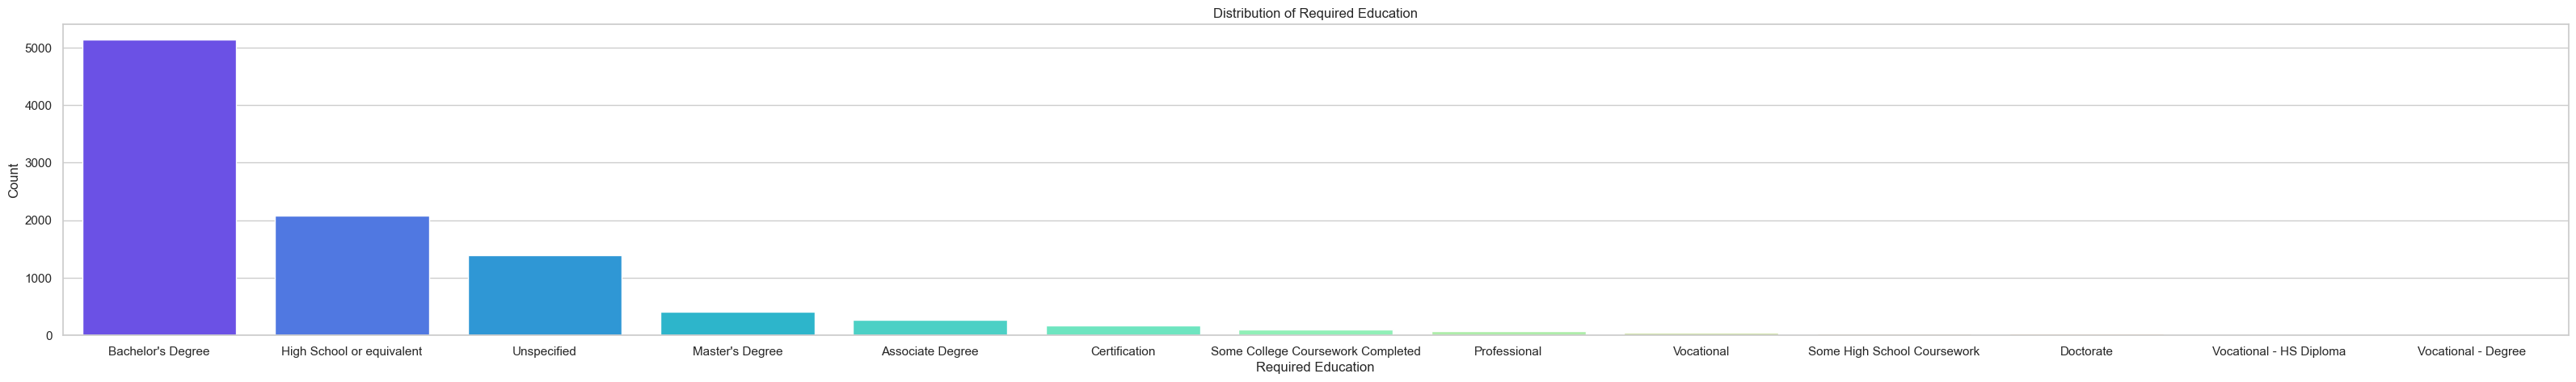

In [35]:
required_education_counts = df['required_education'].value_counts()

plt.figure(figsize=(40, 5))
sns.barplot(x=required_education_counts.index, y=required_education_counts.values, palette='rainbow')
plt.xlabel('Required Education')
plt.ylabel('Count')
plt.title('Distribution of Required Education')
plt.show()

### We have used magma color palette by visualisation we can see the count of top 20 most frequent departments data

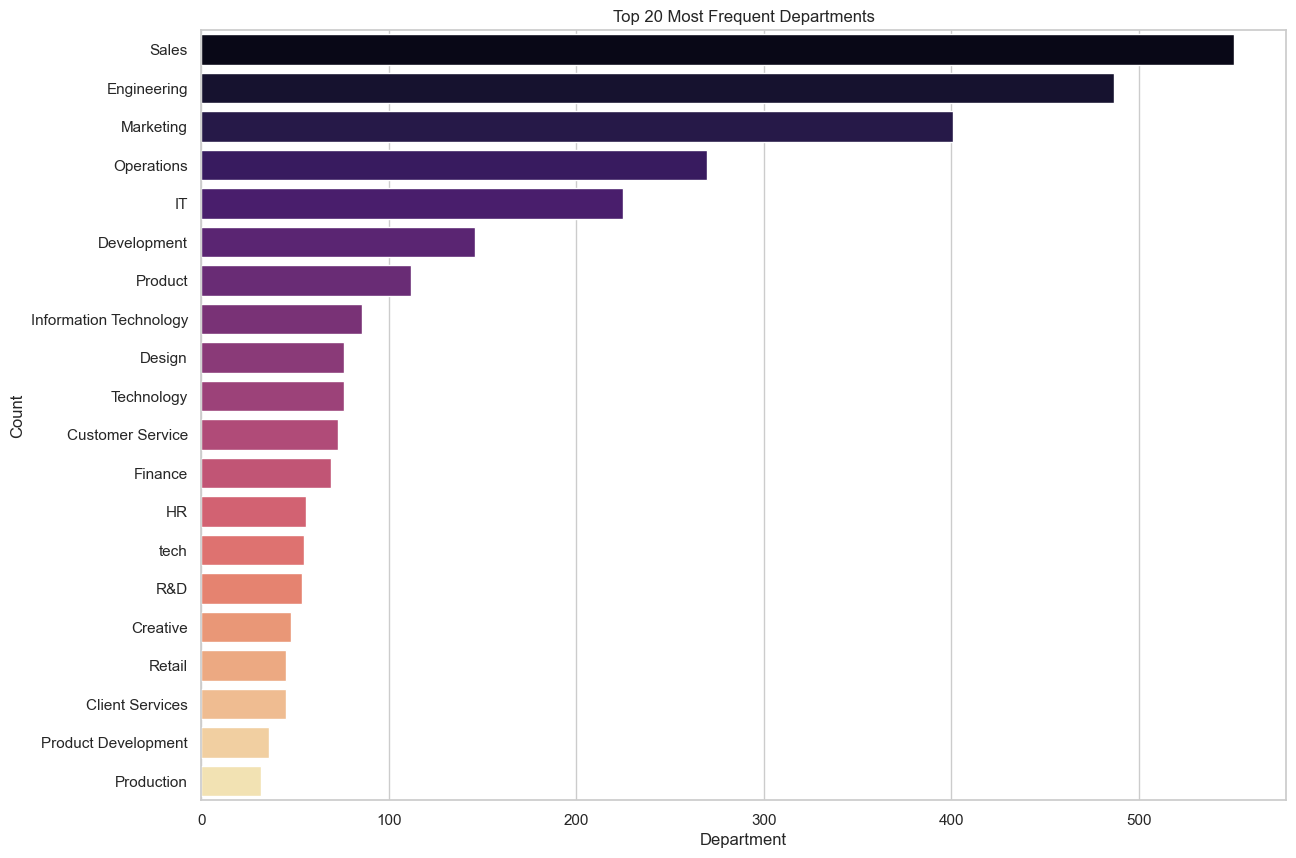

In [36]:
department_counts = df['department'].value_counts()

top_20_departments = department_counts.head(20)

plt.figure(figsize=(14, 10))
sns.barplot(y=top_20_departments.index, x=top_20_departments.values, palette='magma')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent Departments')
plt.show()

### We have used rainbow color palette by visualisation we can see the count of top 20 most frequent industries data

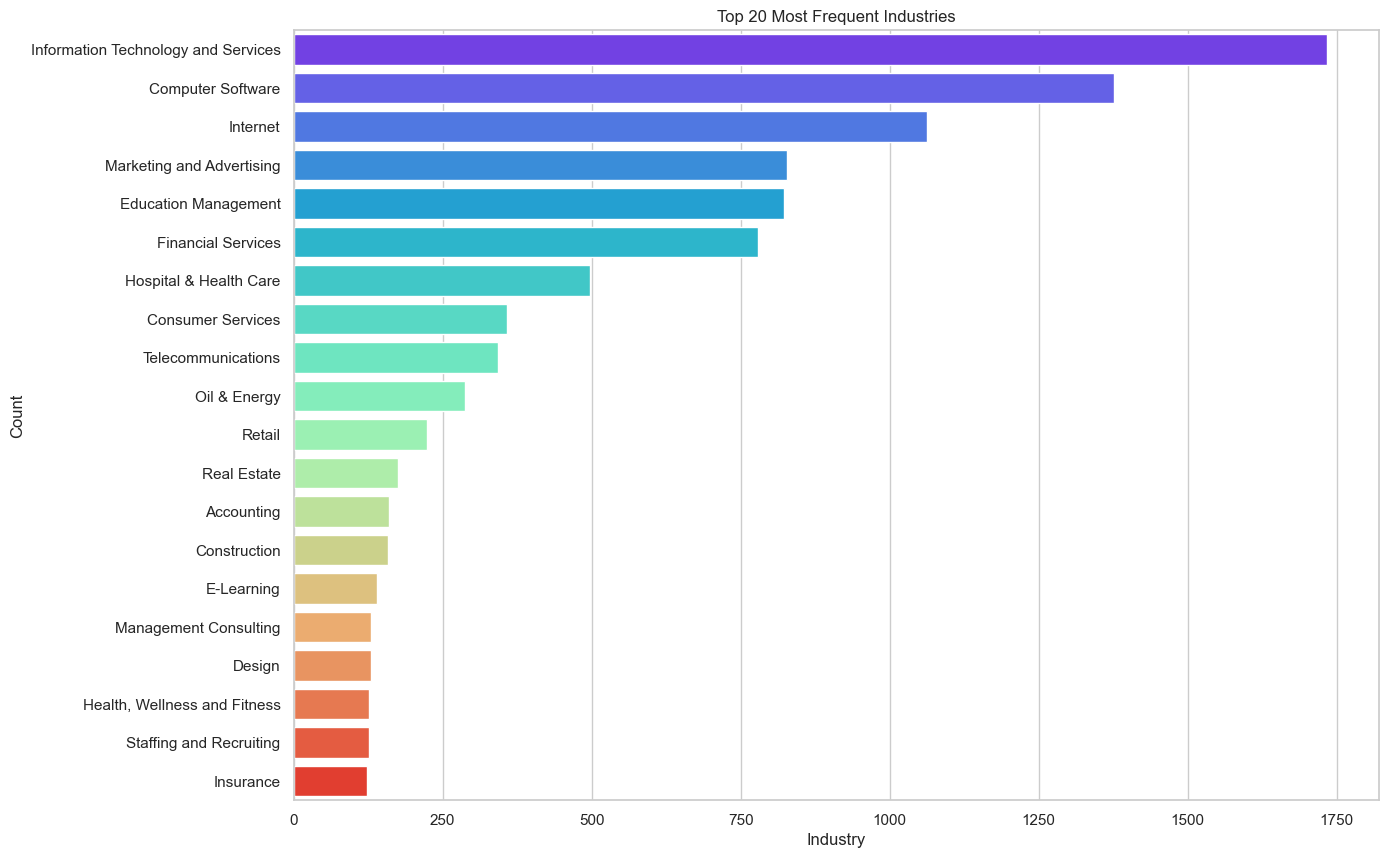

In [37]:
industry_counts = df['industry'].value_counts()

top_20_industry = industry_counts.head(20)

plt.figure(figsize=(14, 10))
sns.barplot(y=top_20_industry.index, x=top_20_industry.values, palette='rainbow')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent Industries')
plt.show()

### We have used rainbow color palette by visualisation we can see the count of top 10 most frequent function data

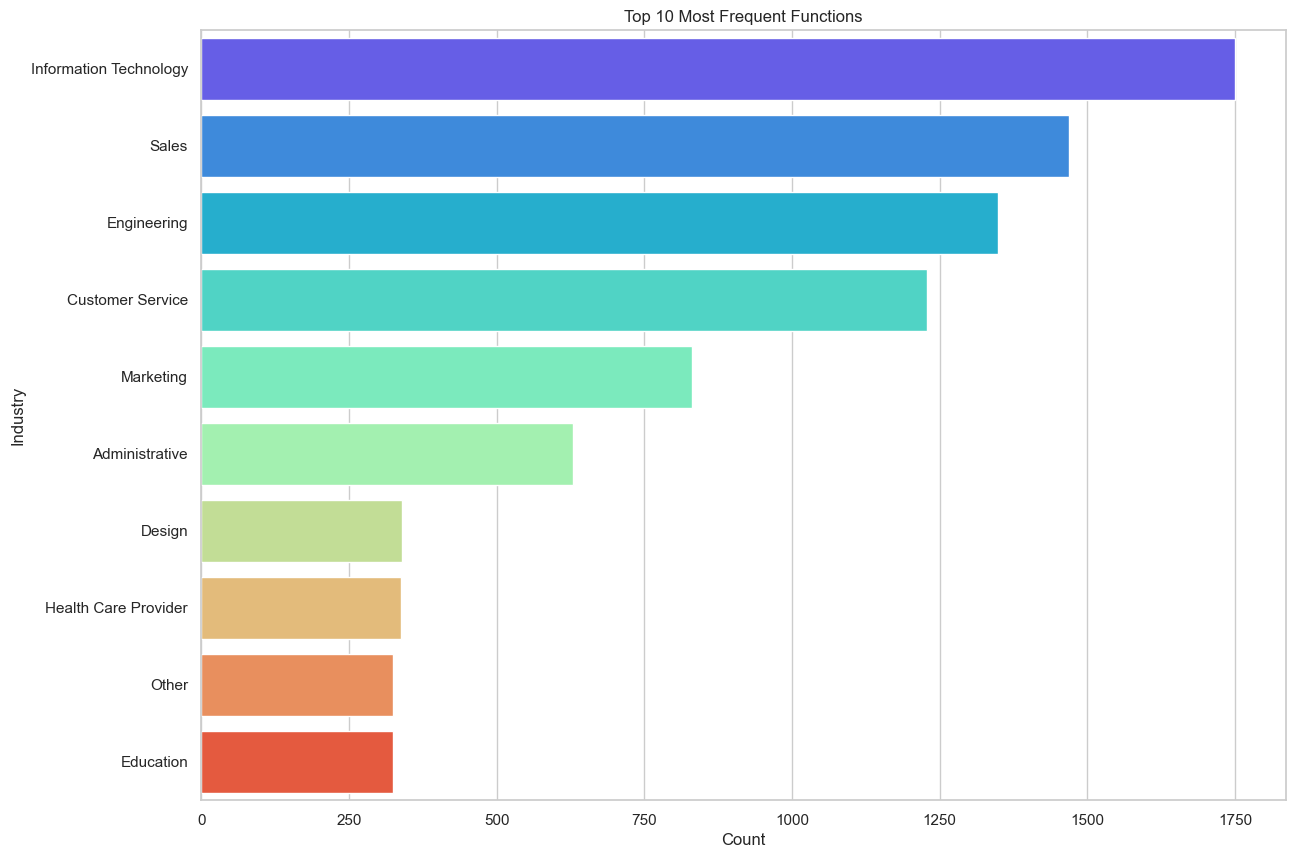

In [38]:
function_counts = df['function'].value_counts()

top_10_function = function_counts.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(y=top_10_function.index, x=top_10_function.values, palette = 'rainbow')
plt.ylabel('Industry')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Functions')
plt.show()

### We will split the location column into separte columns for country and city

In [39]:
location_split = df['location'].str.split(',', expand=True)
df['country'] = location_split[0]
df['city'] = location_split[1]

In [40]:
df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,


### We have used color palette viridis by visualisation we can see the count of Top 10 Most Frequent Country data

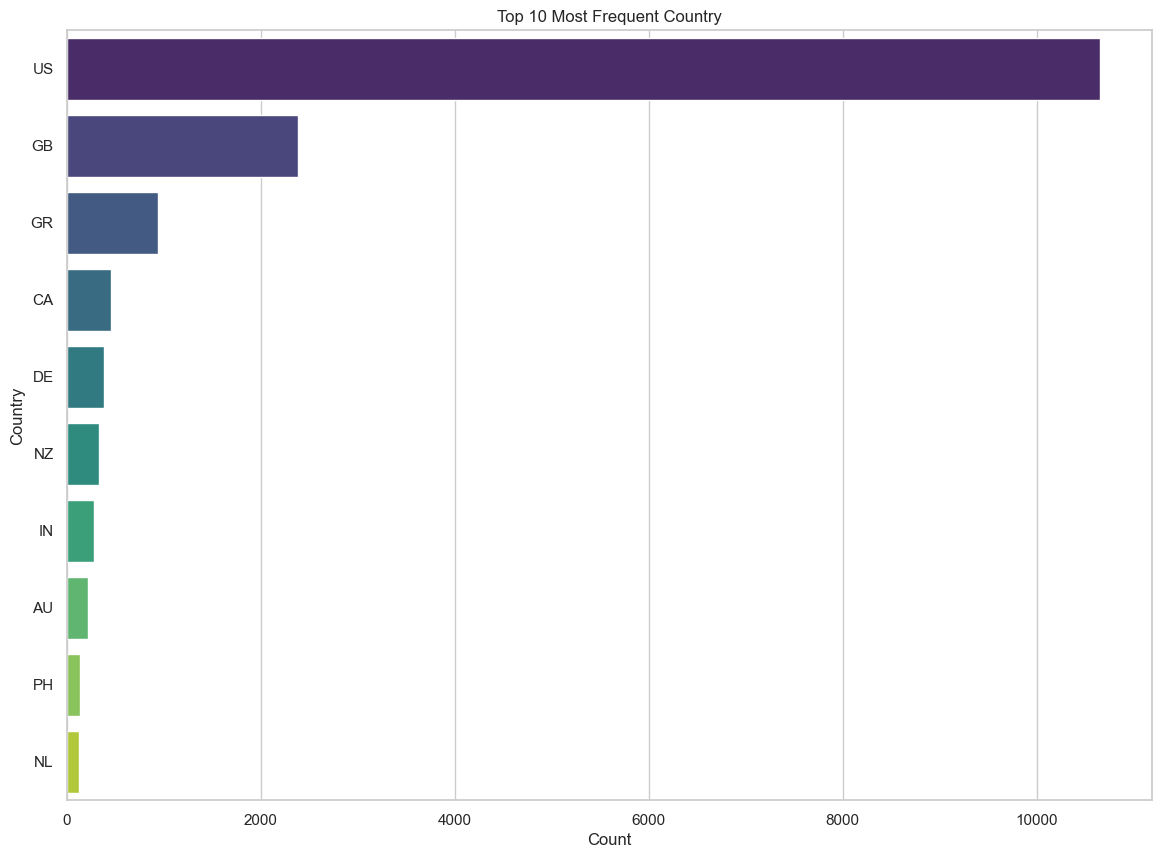

In [41]:
Country_counts = df['country'].value_counts()

top_10_Country = Country_counts.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(y=top_10_Country.index, x=top_10_Country.values, palette='viridis')
plt.ylabel('Country')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Country')
plt.show()

### We have used rainbow color palette by visualisation we can see the count of Top 10 Most Frequent City data

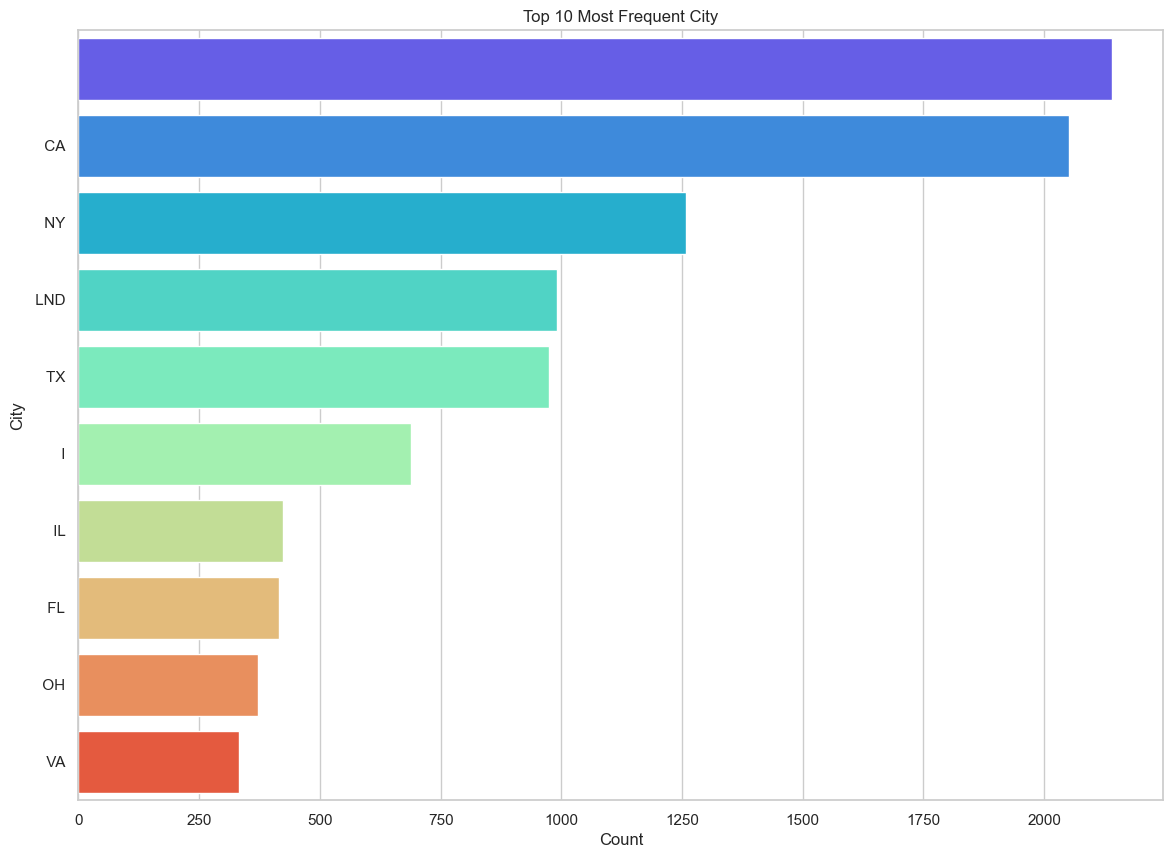

In [42]:
City_counts = df['city'].value_counts()

top_10_City = City_counts.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(y=top_10_City.index, x=top_10_City.values, palette='rainbow')
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent City')
plt.show()

In [28]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

### We will fill the null-values with space -> ' '

In [29]:
df.fillna(' ', inplace=True)

In [30]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Drop columns

In [31]:
df.drop(['job_id'], axis=1, inplace=True)

In [32]:
df.head(3)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0


## concatenating the needed object columns for job posting in one column

In [33]:
columns_to_concat = ['title','location','department','salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function']

df['job_posting'] = df[columns_to_concat].apply(lambda x: ' '.join(x), axis=1)

new_df = df[['job_posting','fraudulent']].copy()

In [34]:
new_df.head(10)

,job_posting,fraudulent
0,"Marketing Intern US, NY, New York Marketing ...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth Spo...",0
5,"Accounting Clerk US, MD, Job OverviewAp...",0
6,"Head of Content (m/f) DE, BE, Berlin ANDROIDPI...",0
7,"Lead Guest Service Specialist US, CA, San F...",0
8,"HP BSM SME US, FL, Pensacola Solutions3 is...",0
9,"Customer Service Associate - Part Time US, AZ...",0


# We will clean the data using NLP

In [35]:
import re
from nltk.corpus import stopwords

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aakil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'[^\w\s]', '', text)  # Keep only words and spaces

    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    text = ' '.join(words)

    return text


In [38]:
# Apply preprocessing
new_df['job_posting'] = new_df['job_posting'].apply(preprocess_text)

In [39]:
new_df.head(10)

,job_posting,fraudulent
0,marketing intern us ny new york marketing food...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma us ia we...,0
3,account executive washington dc us dc washingt...,0
4,bill review manager us fl fort worth spotsourc...,0
5,accounting clerk us md job overviewapex enviro...,0
6,head content mf de berlin androidpit founded f...,0
7,lead guest service specialist us ca san franci...,0
8,hp bsm sme us fl pensacola solutions womanowne...,0
9,customer service associate part time us az pho...,0


In [40]:
Fake = new_df[new_df['fraudulent'] == 1]
Real = new_df[new_df['fraudulent'] == 0]

In [41]:
print("Fake jobs:", len(Fake))
print("Real jobs:", len(Real))
print("Ratio:", len(Fake)/len(Real))

Fake jobs: 866
Real jobs: 17014
Ratio: 0.050899259433407784


In [42]:
Fake.head()

,job_posting,fraudulent
98,ice technician us stocton ca oil energy staffi...,1
144,forward cap group raised fund purchase homes s...,1
173,technician instrument controls us power plant ...,1
180,sales executive pk sd karachi sales sales exec...,1
215,ice technician mt poso us ca bakersfield ca mt...,1


In [43]:
Real.head()

,job_posting,fraudulent
0,marketing intern us ny new york marketing food...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma us ia we...,0
3,account executive washington dc us dc washingt...,0
4,bill review manager us fl fort worth spotsourc...,0


## we will see frequency of the words with wordcloud for both Non-Fraudulent job and Fraudulent job

In [44]:
text_Real = ' '.join(Real['job_posting']) # here we will concatenate all job postings into a single string

In [45]:
text_Real[:500]

'marketing intern us ny new york marketing food weve created groundbreaking awardwinning cooking site support connect celebrate home cooks give everything need one placewe top editorial business engineering team focused using technology find new better ways connect people around specific food interests offer superb highly curated information food cooking attract talented home cooks contributors country also publish wellknown professionals like mario batali gwyneth paltrow danny meyer partnerships'

# wordcloud

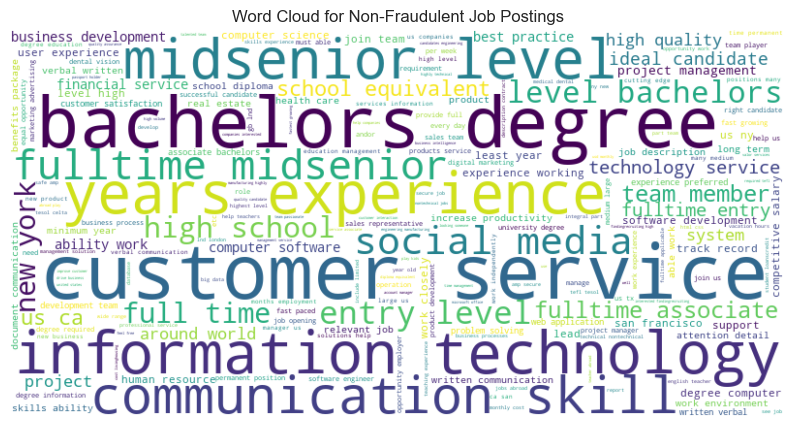

In [61]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_Real)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Fraudulent Job Postings')
plt.show()

In [62]:
text_Fake = ''.join(Fake['job_posting'])

In [63]:
text_Fake[:500]

'ice technician us stocton ca oil energy staffing amp recruiting done right oil amp energy industryrepresented candidates automatically granted following perks expert negotiations behalf maximizing compensation package implimenting ongoing increases significant signing bonus refined resources addition potential signing bonuses client companies offer year access anyperk significant corporate discounts cell phones event tickets house cleaning everything inbetween youll save thousands daily expendit'

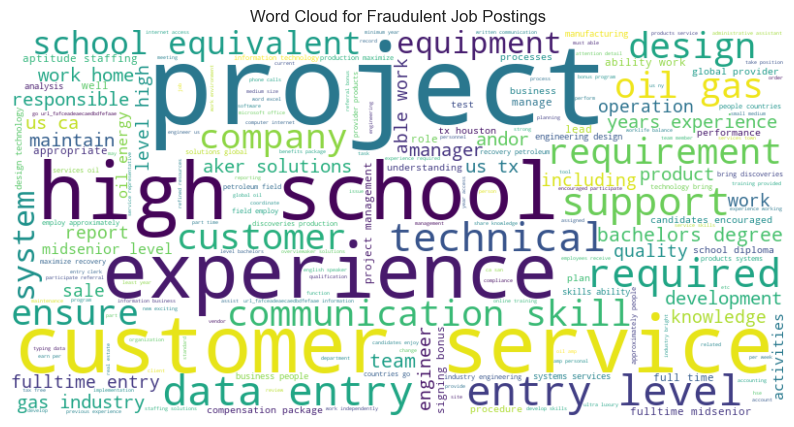

In [64]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_Fake)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fraudulent Job Postings')
plt.show()

# Tokenization

In [65]:
# !pip install nltk

In [46]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aakil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [48]:
new_df['job_posting_tokens'] = new_df['job_posting'].apply(word_tokenize)

new_df['job_posting_sentences'] = new_df['job_posting'].apply(sent_tokenize)

In [49]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    return [lemmatizer.lemmatize(token) for token in tokens]

new_df['job_posting_wordnet_lemmatizer'] = new_df['job_posting'].apply(tokenize_and_lemmatize)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aakil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_wordnet_lemmatizer
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[marketing, intern, u, ny, new, york, marketin..."
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[customer, service, cloud, video, production, ..."
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...,"[commissioning, machinery, assistant, cma, u, ..."
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...,"[account, executive, washington, dc, u, dc, wa..."
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...,"[bill, review, manager, u, fl, fort, worth, sp..."


# Part of Speech

In [51]:
from nltk import pos_tag, word_tokenize

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aakil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aakil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [52]:
def pos_tagging(sentence):
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens


In [53]:
new_df['job_posting_pos_tagged'] = new_df['job_posting_sentences'].apply(lambda x: [pos_tagging(sentence) for sentence in x])

In [54]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_wordnet_lemmatizer,job_posting_pos_tagged
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[marketing, intern, u, ny, new, york, marketin...","[[(marketing, NN), (intern, JJ), (us, PRP), (n..."
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[customer, service, cloud, video, production, ...","[[(customer, NN), (service, NN), (cloud, NN), ..."
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...,"[commissioning, machinery, assistant, cma, u, ...","[[(commissioning, VBG), (machinery, NN), (assi..."
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...,"[account, executive, washington, dc, u, dc, wa...","[[(account, NN), (executive, NN), (washington,..."
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...,"[bill, review, manager, u, fl, fort, worth, sp...","[[(bill, NN), (review, NN), (manager, NN), (us..."


# N-Grams

In [55]:
from nltk.util import ngrams

def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

n = 2

new_df['job_posting_ngrams'] = new_df['job_posting_tokens'].apply(lambda x: generate_ngrams(x, n))

In [56]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_wordnet_lemmatizer,job_posting_pos_tagged,job_posting_ngrams
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[marketing, intern, u, ny, new, york, marketin...","[[(marketing, NN), (intern, JJ), (us, PRP), (n...","[(marketing, intern), (intern, us), (us, ny), ..."
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[customer, service, cloud, video, production, ...","[[(customer, NN), (service, NN), (cloud, NN), ...","[(customer, service), (service, cloud), (cloud..."
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...,"[commissioning, machinery, assistant, cma, u, ...","[[(commissioning, VBG), (machinery, NN), (assi...","[(commissioning, machinery), (machinery, assis..."
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...,"[account, executive, washington, dc, u, dc, wa...","[[(account, NN), (executive, NN), (washington,...","[(account, executive), (executive, washington)..."
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...,"[bill, review, manager, u, fl, fort, worth, sp...","[[(bill, NN), (review, NN), (manager, NN), (us...","[(bill, review), (review, manager), (manager, ..."


In [57]:
new_df.columns

Index(['job_posting', 'fraudulent', 'job_posting_tokens',
       'job_posting_sentences', 'job_posting_wordnet_lemmatizer',
       'job_posting_pos_tagged', 'job_posting_ngrams'],
      dtype='object')

# Vectorize the text data

In [58]:
# Join lemmatized tokens back to string
new_df['lemmatized_text'] = new_df['job_posting_wordnet_lemmatizer'].apply(lambda x: ' '.join(x))



In [59]:
new_df.head(2)

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_wordnet_lemmatizer,job_posting_pos_tagged,job_posting_ngrams,lemmatized_text
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[marketing, intern, u, ny, new, york, marketin...","[[(marketing, NN), (intern, JJ), (us, PRP), (n...","[(marketing, intern), (intern, us), (us, ny), ...",marketing intern u ny new york marketing food ...
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[customer, service, cloud, video, production, ...","[[(customer, NN), (service, NN), (cloud, NN), ...","[(customer, service), (service, cloud), (cloud...",customer service cloud video production nz auc...


In [60]:
model_df = new_df[['lemmatized_text', 'fraudulent']]

In [61]:
model_df.head(3)

,lemmatized_text,fraudulent
0,marketing intern u ny new york marketing food ...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma u ia wev...,0


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [69]:
X = vectorizer.fit_transform(new_df['lemmatized_text'])
y = new_df['fraudulent']

In [70]:
joblib.dump(vectorizer, "../models/vectorizer.pkl")


['../models/vectorizer.pkl']

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
import mlflow
import dagshub

mlflow.set_tracking_uri('https://dagshub.com/mdakeel/fake-job-predictor-extension.mlflow')

dagshub.init(repo_owner='mdakeel', repo_name='fake-job-predictor-extension', mlflow=True)

Accessing as mdakeel

Initialized MLflow to track repo "mdakeel/fake-job-predictor-extension"

Repository mdakeel/fake-job-predictor-extension initialized!

# LogisticRegression with MLflow

In [86]:

# import mlflow
# import logging
# import os
# import time
# import joblib
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Configure logging
# logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# logging.info("Starting MLflow run...")

# with mlflow.start_run():
#     start_time = time.time()
    
#     try:
#         logging.info("Logging preprocessing parameters...")
#         mlflow.log_param("model", "Logistic Regression ")
#         mlflow.log_param("vectorizer", "TF-IDF")
#         mlflow.log_param("num_features", X_train.shape[1])

#         mlflow.log_param("test_size", 0.2)

#         logging.info("Initializing Logistic Regression model...")
#         model = LogisticRegression(max_iter=1000)  

#         logging.info("Fitting the model...")
#         model.fit(X_train, y_train)
#         logging.info("Model training complete.")

#         logging.info("Logging model parameters...")

#         logging.info("Making predictions...")
#         y_pred = model.predict(X_test)

#         logging.info("Calculating evaluation metrics...")
#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred)
#         recall = recall_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred)

#         logging.info("Logging evaluation metrics...")
#         mlflow.log_metric("accuracy", accuracy)
#         mlflow.log_metric("precision", precision)
#         mlflow.log_metric("recall", recall)
#         mlflow.log_metric("f1_score", f1)

#         logging.info("Saving and logging the model...")
#         # mlflow.sklearn.log_model(model, name="model")
#         # mlflow.sklearn.log_model(model, artifact_path="model")
        
#         folder_name = "../models/logistic_reg"
#         os.makedirs(folder_name, exist_ok=True) 
#         model_path = os.path.join(folder_name, "model.pkl")
#         joblib.dump(model, model_path)
#         mlflow.log_artifact(model_path)



#         # Log execution time
#         end_time = time.time()
#         logging.info(f"Model training and logging completed in {end_time - start_time:.2f} seconds.")

#         # Save and log the notebook
#         # notebook_path = "exp1_baseline_model.ipynb"
#         # logging.info("Executing Jupyter Notebook. This may take a while...")
#         # os.system(f"jupyter nbconvert --to notebook --execute --inplace {notebook_path}")
#         # mlflow.log_artifact(notebook_path)

#         # logging.info("Notebook execution and logging complete.")

#         # Print the results for verification
#         logging.info(f"Accuracy: {accuracy}")
#         logging.info(f"Precision: {precision}")
#         logging.info(f"Recall: {recall}")
#         logging.info(f"F1 Score: {f1}")

#     except Exception as e:
#         logging.error(f"An error occurred: {e}", exc_info=True)

# Random forest 

In [87]:
# import mlflow
# import logging
# import os
# import time
# import joblib
# from sklearn.metrics import confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Configure logging
# logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# logging.info("Starting MLflow run...")

# mlflow.set_experiment("fraud_detection_random_forest")

# with mlflow.start_run(run_name="fraud_detection_random_forest"):
#     start_time = time.time()
    
#     try:
#         logging.info("Logging preprocessing parameters...")
#         mlflow.log_param("model", "Random Forest")
#         mlflow.log_param("vectorizer", "TF-IDF")
#         mlflow.log_param("num_features", X_train.shape[1])
#         mlflow.log_param("n_estimators", 200)
#         mlflow.log_param("max_depth", 8)
#         mlflow.log_param("min_samples_split", 10)
#         mlflow.log_param("min_samples_leaf", 4)
#         mlflow.log_param("class_balanced", "balanced")

#         logging.info("Initializing Random Forest model...")
#         model = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_split=10, min_samples_leaf=4, class_weight='balanced', random_state=42)

#         logging.info("Fitting the model...")
#         model.fit(X_train, y_train)
#         logging.info("Model training complete.")

#         logging.info("Making predictions...")
#         y_pred = model.predict(X_test)

#         logging.info("Calculating evaluation metrics...")
#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred)
#         recall = recall_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred)
        
#         cm = confusion_matrix(y_test, y_pred)
#         sns.heatmap(cm, annot=True, fmt='d')
#         plt.savefig("conf_matrix.png")
#         mlflow.log_artifact("conf_matrix.png")

#         logging.info("Logging evaluation metrics...")
#         mlflow.log_metric("accuracy", accuracy)
#         mlflow.log_metric("precision", precision)
#         mlflow.log_metric("recall", recall)
#         mlflow.log_metric("f1_score", f1)

#         logging.info("Saving and logging the model...")
#         folder_name = "../models/random_forest"
#         os.makedirs(folder_name, exist_ok=True)
#         model_path = os.path.join(folder_name, "model.pkl")
#         joblib.dump(model, model_path)
#         mlflow.log_artifact(model_path)

#         end_time = time.time()
#         logging.info(f"Model training and logging completed in {end_time - start_time:.2f} seconds.")

#         logging.info(f"Accuracy: {accuracy}")
#         logging.info(f"Precision: {precision}")
#         logging.info(f"Recall: {recall}")
#         logging.info(f"F1 Score: {f1}")

#     except Exception as e:
#         logging.error(f"An error occurred: {e}", exc_info=True)


# 

# XGBoost

In [88]:
# import mlflow
# import logging
# import os
# import time
# import joblib
# import seaborn as sns
# import matplotlib.pyplot as plt
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Configure logging
# logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# logging.info("Starting MLflow run...")

# mlflow.set_experiment("fraud_detection_xgboost")

# with mlflow.start_run(run_name="fraud_detection_xgboost"):
#     start_time = time.time()
    
#     try:
#         logging.info("Logging preprocessing parameters...")
#         mlflow.log_param("model", "XGBoost")
#         mlflow.log_param("vectorizer", "TF-IDF")
#         mlflow.log_param("num_features", X_train.shape[1])
#         mlflow.log_param("n_estimators", 200)
#         mlflow.log_param("max_depth", 6)
#         mlflow.log_param("scale_pos_weight", 5)
#         mlflow.log_param("eval_metric", "logloss")

#         logging.info("Initializing XGBoost model...")
#         model = XGBClassifier(
#             n_estimators=200,
#             max_depth=6,
#             scale_pos_weight=5,  # adjust based on class imbalance
#             use_label_encoder=False,
#             eval_metric='logloss',
#             random_state=42
#         )

#         logging.info("Fitting the model...")
#         model.fit(X_train, y_train)
#         logging.info("Model training complete.")

#         logging.info("Making predictions...")
#         y_pred = model.predict(X_test)

#         logging.info("Calculating evaluation metrics...")
#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred)
#         recall = recall_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred)

#         cm = confusion_matrix(y_test, y_pred)
#         sns.heatmap(cm, annot=True, fmt='d')
#         plt.savefig("conf_matrix_xgb.png")
#         mlflow.log_artifact("conf_matrix_xgb.png")

#         logging.info("Logging evaluation metrics...")
#         mlflow.log_metric("accuracy", accuracy)
#         mlflow.log_metric("precision", precision)
#         mlflow.log_metric("recall", recall)
#         mlflow.log_metric("f1_score", f1)

#         logging.info("Saving and logging the model...")
#         folder_name = "../models/xgboost"
#         os.makedirs(folder_name, exist_ok=True)
#         model_path = os.path.join(folder_name, "model.pkl")
#         joblib.dump(model, model_path)
#         mlflow.log_artifact(model_path)

#         end_time = time.time()
#         logging.info(f"Model training and logging completed in {end_time - start_time:.2f} seconds.")

#         logging.info(f"Accuracy: {accuracy}")
#         logging.info(f"Precision: {precision}")
#         logging.info(f"Recall: {recall}")
#         logging.info(f"F1 Score: {f1}")

#     except Exception as e:
#         logging.error(f"An error occurred: {e}", exc_info=True)


# Naive Bayes

In [89]:
# import mlflow
# import logging
# import os
# import time
# import joblib
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.naive_bayes import MultinomialNB, ComplementNB
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Configure logging
# logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# logging.info("Starting MLflow run...")

# mlflow.set_experiment("fraud_detection_naive_bayes")

# with mlflow.start_run(run_name="fraud_detection_naive_bayes"):
#     start_time = time.time()
    
#     try:
#         logging.info("Logging preprocessing parameters...")
#         mlflow.log_param("model", "Naive Bayes")
#         mlflow.log_param("vectorizer", "TF-IDF")
#         mlflow.log_param("num_features", X_train.shape[1])
#         # mlflow.log_param("alpha", 1.0)  # default smoothing

#         logging.info("Initializing Naive Bayes model...")
#         # model = MultinomialNB(alpha=1.0)
        
#         model = ComplementNB()

#         logging.info("Fitting the model...")
#         model.fit(X_train, y_train)
#         logging.info("Model training complete.")

#         logging.info("Making predictions...")
#         y_pred = model.predict(X_test)

#         logging.info("Calculating evaluation metrics...")
#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred)
#         recall = recall_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred)

#         cm = confusion_matrix(y_test, y_pred)
#         sns.heatmap(cm, annot=True, fmt='d')
#         plt.savefig("conf_matrix_nb.png")
#         mlflow.log_artifact("conf_matrix_nb.png")

#         logging.info("Logging evaluation metrics...")
#         mlflow.log_metric("accuracy", accuracy)
#         mlflow.log_metric("precision", precision)
#         mlflow.log_metric("recall", recall)
#         mlflow.log_metric("f1_score", f1)

#         logging.info("Saving and logging the model...")
#         folder_name = "../models/naive_bayes"
#         os.makedirs(folder_name, exist_ok=True)
#         model_path = os.path.join(folder_name, "model.pkl")
#         joblib.dump(model, model_path)
#         mlflow.log_artifact(model_path)

#         end_time = time.time()
#         logging.info(f"Model training and logging completed in {end_time - start_time:.2f} seconds.")

#         logging.info(f"Accuracy: {accuracy}")
#         logging.info(f"Precision: {precision}")
#         logging.info(f"Recall: {recall}")
#         logging.info(f"F1 Score: {f1}")

#     except Exception as e:
#         logging.error(f"An error occurred: {e}", exc_info=True)


# GridSearchCV Setup for Tuning

In [90]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [4, 6],
#     'learning_rate': [0.1],
#     'scale_pos_weight': [3, 5]
# }

# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# print("Best Params:", grid_search.best_params_)


# xgboost tuned model

# data imbalanced , applying SMOTE

In [91]:
# import mlflow
# import logging
# import os
# import time
# import joblib
# import seaborn as sns
# import matplotlib.pyplot as plt
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Configure logging
# logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# logging.info("Starting MLflow run...")

# mlflow.set_experiment("fraud_detection_xgboost_tuned")

# with mlflow.start_run(run_name="xgboost_best_params"):
#     start_time = time.time()
    
#     try:
#         logging.info("Logging preprocessing parameters...")
#         mlflow.log_param("model", "XGBoost")
#         mlflow.log_param("vectorizer", "TF-IDF")
#         mlflow.log_param("num_features", X_train.shape[1])
#         mlflow.log_param("learning_rate", 0.1)
#         mlflow.log_param("max_depth", 6)
#         mlflow.log_param("n_estimators", 200)
#         mlflow.log_param("scale_pos_weight", 5)
#         mlflow.log_param("eval_metric", "logloss")

#         logging.info("Initializing XGBoost model with best parameters...")
#         model = XGBClassifier(
#             learning_rate=0.1,
#             max_depth=6,
#             n_estimators=200,
#             scale_pos_weight=5,
#             use_label_encoder=False,
#             eval_metric='logloss',
#             random_state=42
#         )

#         logging.info("Fitting the model...")
#         model.fit(X_resampled, y_resampled)
#         logging.info("Model training complete.")

#         logging.info("Making predictions...")
#         y_pred = model.predict(X_test)

#         logging.info("Calculating evaluation metrics...")
#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred)
#         recall = recall_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred)

#         cm = confusion_matrix(y_test, y_pred)
#         sns.heatmap(cm, annot=True, fmt='d')
#         plt.savefig("conf_matrix_xgb_best.png")
#         mlflow.log_artifact("conf_matrix_xgb_best.png")

#         logging.info("Logging evaluation metrics...")
#         mlflow.log_metric("accuracy", accuracy)
#         mlflow.log_metric("precision", precision)
#         mlflow.log_metric("recall", recall)
#         mlflow.log_metric("f1_score", f1)

#         logging.info("Saving and logging the model...")
#         folder_name = "../models/xgboost_best"
#         os.makedirs(folder_name, exist_ok=True)
#         model_path = os.path.join(folder_name, "model.pkl")
#         joblib.dump(model, model_path)
#         mlflow.log_artifact(model_path)

#         end_time = time.time()
#         logging.info(f"Model training and logging completed in {end_time - start_time:.2f} seconds.")

#         logging.info(f"Accuracy: {accuracy}")
#         logging.info(f"Precision: {precision}")
#         logging.info(f"Recall: {recall}")
#         logging.info(f"F1 Score: {f1}")

#     except Exception as e:
#         logging.error(f"An error occurred: {e}", exc_info=True)


# SMOTE with tuned 

2025-09-24 10:02:13,696 - INFO - Starting MLflow run...


2025-09-24 10:02:14,488 - INFO - Applying SMOTE to balance training data...
2025-09-24 10:02:14,753 - INFO - Class distribution after SMOTE: Counter({0: 13619, 1: 13619})
2025-09-24 10:02:15,932 - INFO - Logging preprocessing parameters...
2025-09-24 10:02:20,183 - INFO - Initializing XGBoost model with best parameters...
2025-09-24 10:02:20,186 - INFO - Fitting the model on SMOTE-resampled data...
2025-09-24 10:04:22,066 - INFO - Model training complete.
2025-09-24 10:04:22,070 - INFO - Making predictions...


Train F1: 0.9920116194625999
Test F1: 0.829971181556196


2025-09-24 10:04:23,528 - INFO - Calculating evaluation metrics...
2025-09-24 10:04:24,772 - INFO - Logging evaluation metrics...
2025-09-24 10:04:29,623 - INFO - Saving and logging the model...
2025-09-24 10:04:31,243 - INFO - Model training and logging completed in 136.76 seconds.
2025-09-24 10:04:31,248 - INFO - Accuracy: 0.9835011185682326
2025-09-24 10:04:31,248 - INFO - Precision: 0.8674698795180723
2025-09-24 10:04:31,255 - INFO - Recall: 0.7955801104972375
2025-09-24 10:04:31,258 - INFO - F1 Score: 0.829971181556196


🏃 View run xgboost_smote_tuned_final at: https://dagshub.com/mdakeel/fake-job-predictor-extension.mlflow/#/experiments/5/runs/c12c2bb90dbb43c3a5a644dca5745651
🧪 View experiment at: https://dagshub.com/mdakeel/fake-job-predictor-extension.mlflow/#/experiments/5


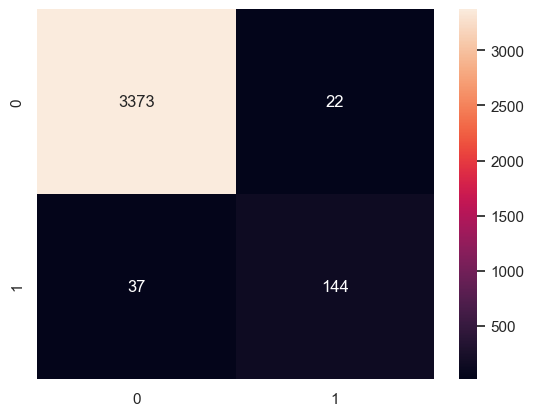

In [127]:
import mlflow
import logging
import os
import time
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

logging.info("Starting MLflow run...")

mlflow.set_experiment("fraud_detection_xgboost_smote")

with mlflow.start_run(run_name="xgboost_smote_tuned_final"):
    start_time = time.time()
    
    try:
        logging.info("Applying SMOTE to balance training data...")
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        logging.info(f"Class distribution after SMOTE: {Counter(y_resampled)}")
        mlflow.log_param("smote_applied", True)
        mlflow.log_param("original_class_distribution", dict(Counter(y_train)))
        mlflow.log_param("resampled_class_distribution", dict(Counter(y_resampled)))

        logging.info("Logging preprocessing parameters...")
        mlflow.log_param("model", "XGBoost")
        mlflow.log_param("vectorizer", "TF-IDF")
        mlflow.log_param("num_features", X_train.shape[1])
        mlflow.log_param("learning_rate", 0.1)
        mlflow.log_param("max_depth", 7)
        mlflow.log_param("n_estimators", 200)
        mlflow.log_param("scale_pos_weight", 5)
        mlflow.log_param("eval_metric", "logloss")
        mlflow.log_param("reg_alpha", 0.5)
        mlflow.log_param("reg_lambda", 1.0)
        mlflow.log_param("test_size" , 0.2)
        
        

        logging.info("Initializing XGBoost model with best parameters...")
        model = XGBClassifier(
            learning_rate=0.1,
            max_depth=7,
            n_estimators=200,
            scale_pos_weight=5,
            reg_alpha=0.5,     # L1 regularization
            reg_lambda=1.0,    # L2 regularization
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )


        logging.info("Fitting the model on SMOTE-resampled data...")
        model.fit(X_resampled, y_resampled)


        logging.info("Model training complete.")

        logging.info("Making predictions...")
        y_pred = model.predict(X_test)
        
        y_train_pred = model.predict(X_train)
        train_f1 = f1_score(y_train, y_train_pred)
        test_f1 = f1_score(y_test, y_pred)
        print("Train F1:", train_f1)
        print("Test F1:", test_f1)
        
        mlflow.log_metric("train_test_f1_gap", train_f1 - test_f1)


        logging.info("Calculating evaluation metrics...")
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d')
        plt.savefig("conf_matrix_xgb_smote.png")
        mlflow.log_artifact("conf_matrix_xgb_smote.png")

        logging.info("Logging evaluation metrics...")
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        logging.info("Saving and logging the model...")
        folder_name = "../models/xgboost_smote"
        os.makedirs(folder_name, exist_ok=True)
        model_path = os.path.join(folder_name, "model.pkl")
        joblib.dump(model, model_path)
        mlflow.log_artifact(model_path)

        end_time = time.time()
        logging.info(f"Model training and logging completed in {end_time - start_time:.2f} seconds.")

        logging.info(f"Accuracy: {accuracy}")
        logging.info(f"Precision: {precision}")
        logging.info(f"Recall: {recall}")
        logging.info(f"F1 Score: {f1}")

    except Exception as e:
        logging.error(f"An error occurred: {e}", exc_info=True)


In [130]:
import shap

X_test_dense = X_test.toarray()
explainer = shap.Explainer(model, X_test_dense)
shap_values = explainer(X_test_dense)


 98%|===================| 3510/3576 [00:23<00:00]        

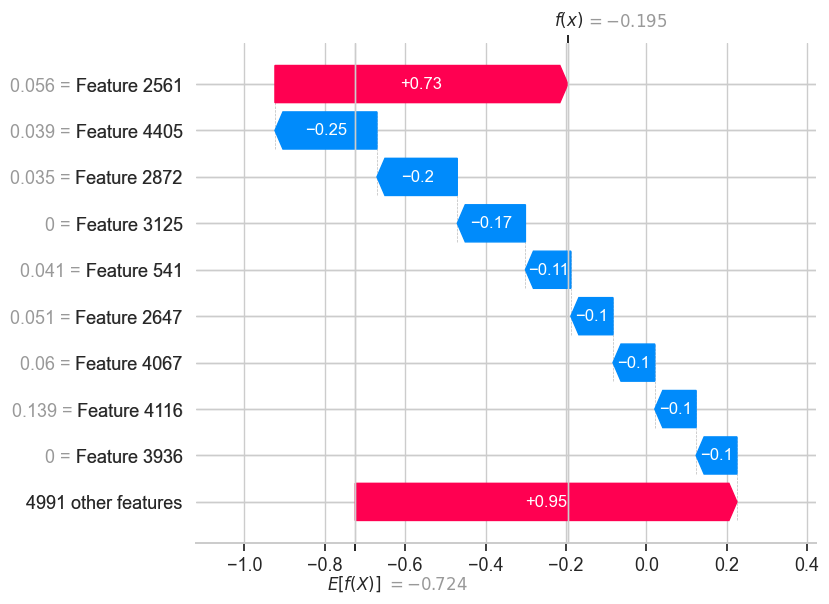

In [131]:
shap.plots.waterfall(shap_values[0])


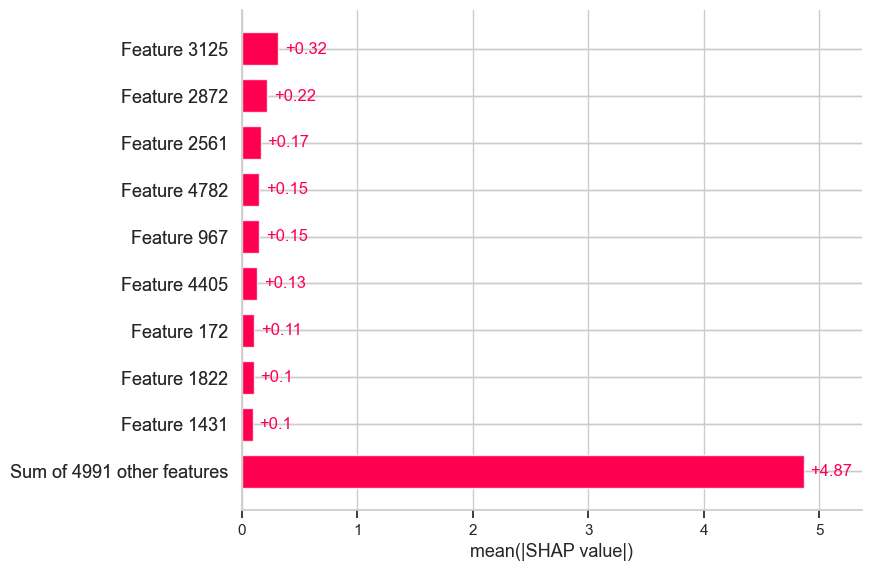

In [132]:
shap.plots.bar(shap_values)


In [133]:
plt.savefig("shap_waterfall.png")
mlflow.log_artifact("shap_waterfall.png")


2025-09-24 10:12:37,360 - WARNING - Retrying (Retry(total=6, connect=7, read=6, redirect=7, status=7)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /mdakeel/fake-job-predictor-extension.mlflow/api/2.0/mlflow/runs/create


<Figure size 640x480 with 0 Axes>

In [93]:
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping & receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]